In [25]:
import seaborn as sns
import pandas as pd
import sklearn.preprocessing as sklp
from sklearn.preprocessing import StandardScaler
import scipy
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cbook
from matplotlib import cm

In [26]:
df = pd.read_csv('data.csv')
sub = pd.read_csv('sample_submission.csv')

In [27]:
df.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [28]:
df.describe()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
count,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,...,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000
mean,48999.500000,0.001220,0.005580,-0.001042,-0.000700,-0.003522,-0.001612,-0.003042,5.545918,6.763061,...,-0.004513,-0.000515,-0.001670,-0.038752,-0.220002,0.166434,-0.064309,-0.062540,0.098472,-0.230910
std,28290.307527,1.002801,1.000742,1.001373,1.000422,1.003061,1.000532,0.997434,3.691840,4.152348,...,1.004372,1.002962,0.999703,1.477858,1.494836,1.543014,1.576086,1.428055,1.305407,1.528476
min,0.000000,-4.732235,-4.202795,-4.377021,-4.010826,-4.535903,-4.300767,-4.894525,0.000000,0.000000,...,-4.894525,-4.732235,-4.438130,-6.873999,-8.234305,-7.792363,-6.593842,-7.375719,-7.335556,-6.954151
25%,24499.750000,-0.675226,-0.670985,-0.672779,-0.672540,-0.682510,-0.675066,-0.680421,3.000000,4.000000,...,-0.678773,-0.679777,-0.675147,-1.022964,-1.203204,-0.903385,-1.128966,-0.975680,-0.746489,-1.262606
50%,48999.500000,0.002022,0.006650,-0.000324,-0.003185,-0.003307,0.001024,-0.002053,5.000000,6.000000,...,-0.000587,-0.000806,0.000819,-0.056687,-0.219046,0.167074,-0.099221,-0.070852,0.082230,-0.271319
75%,73499.250000,0.677271,0.677746,0.677086,0.672097,0.677589,0.673344,0.668112,8.000000,9.000000,...,0.672149,0.675437,0.676881,0.930158,0.764690,1.217432,0.987684,0.843212,0.925306,0.770516
max,97999.000000,4.490521,4.324974,4.560247,4.399373,4.050549,4.710316,3.998595,32.000000,30.000000,...,4.560247,4.399373,4.135419,6.517721,6.054831,7.527271,7.544731,7.005608,7.205971,6.977150


In [29]:
sscaler = StandardScaler()

df_s = sscaler.fit_transform(df)

In [30]:
df_s

array([[-1.73203313, -0.3895505 , -0.91769495, ...,  0.96048158,
         1.04529612,  0.68332274],
       [-1.73199779, -0.6885438 , -0.45919476, ..., -0.55294213,
         0.3554352 , -1.60267076],
       [-1.73196244,  0.80560694,  0.31875345, ...,  0.97917134,
        -0.92625017, -2.22432704],
       ...,
       [ 1.73196244, -0.24988501, -0.46478181, ...,  1.54422962,
         1.1855134 ,  0.57075203],
       [ 1.73199779,  0.30932332,  2.17805293, ..., -1.08428749,
        -0.5474945 ,  0.10775421],
       [ 1.73203313,  0.75184799,  0.56149   , ..., -0.63608329,
         1.00085474, -0.31416284]])

In [62]:
from sklearn.cluster import KMeans

K = 3

kmeans = KMeans(n_clusters=K)
kmeans.fit(df_s)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

C:\Users\peric\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


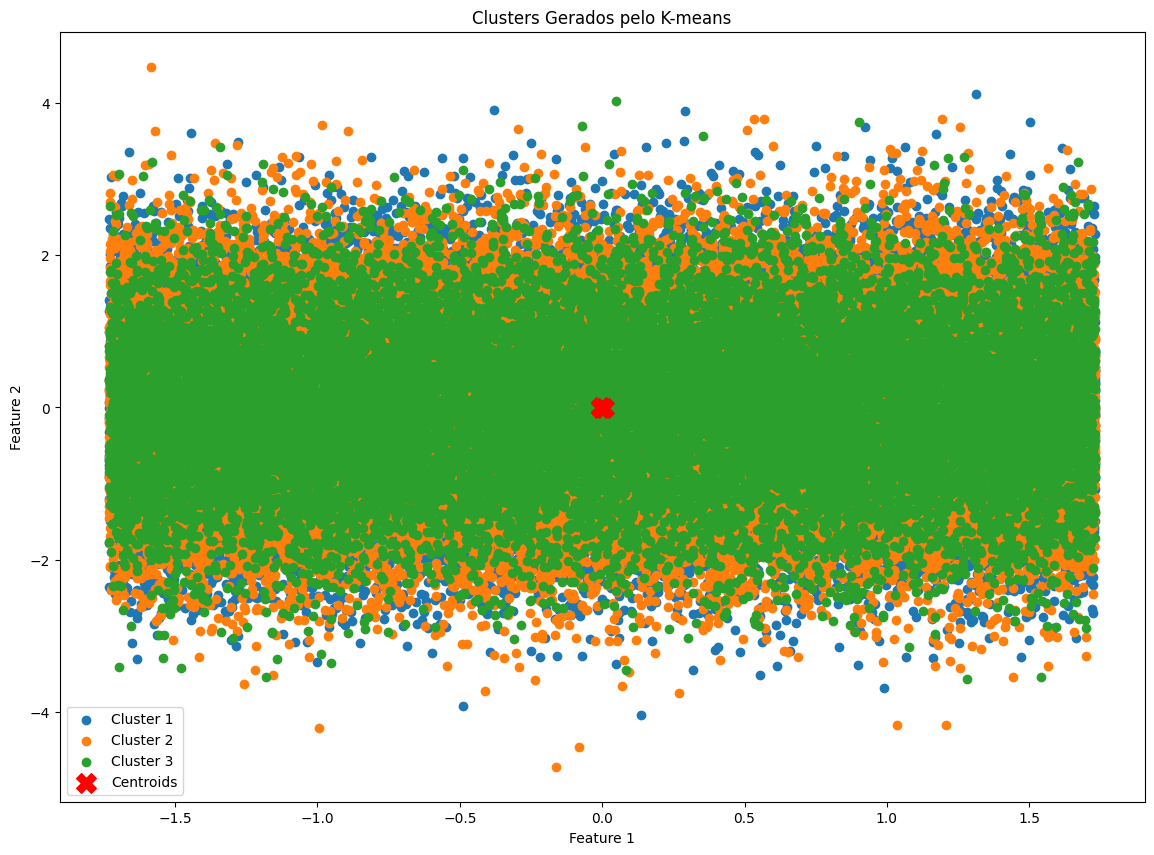

In [63]:
plt.figure(figsize=(14, 10))
for i in range(K):
    plt.scatter(df_s[labels == i, 0], df_s[labels == i, 1], label=f'Cluster {i+1}')

# Plotando os centróides
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red', label='Centroids')

plt.title('Clusters Gerados pelo K-means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [56]:
def elbow(data, max_k):
    means = []
    inertias = []

    for k in (1, max_k):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

C:\Users\peric\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\peric\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


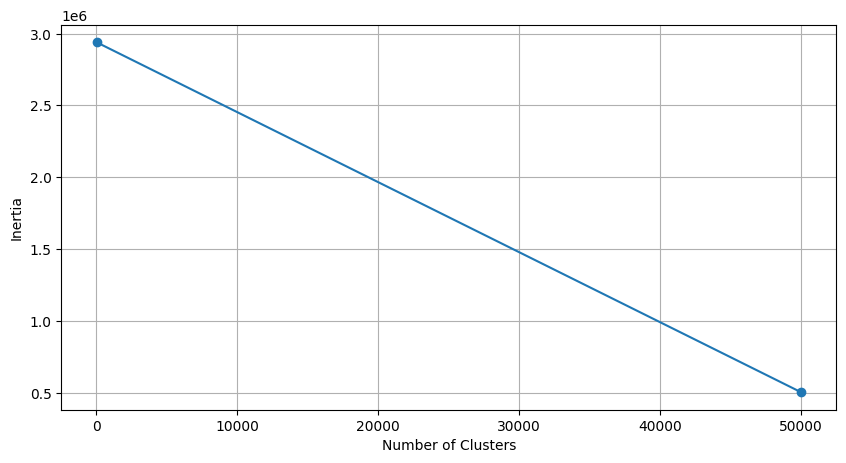

In [61]:
elbow(df_s, 50000)

In [51]:
# Importando as bibliotecas necessárias
from sklearn.cluster import AgglomerativeClustering

# Criando dados de exemplo
np.random.seed(0)

# Definindo o número de clusters
num_clusters = 3

# Criando o objeto AgglomerativeClustering
agglomerative_clustering = AgglomerativeClustering(n_clusters=num_clusters)

# Realizando o agrupamento hierárquico
labels = agglomerative_clustering.fit_predict(df_s)

# Visualizando os clusters
plt.figure(figsize=(8, 6))

# Plotando os pontos de dados para cada cluster
for i in range(num_clusters):
    plt.scatter(df_s[labels == i, 0], df_s[labels == i, 1], label=f'Cluster {i+1}')

plt.title('Clusters Gerados pelo Agrupamento Hierárquico')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


MemoryError: Unable to allocate 35.8 GiB for an array with shape (4801951000,) and data type float64